![](https://thumbs.gfycat.com/ShorttermEcstaticGoldfish-size_restricted.gif)



# Contents 
 
- [Description](#description)
- [Learning : if you are a newby](#if_u_newby)
- [Package Used](#packaged)
- [Reading data files](#reading)
- [Some analysis and findings on Wage](#wageanalysis)
- [Preferred Foot, Overall rating and Wage](#preow)
- [Nationality, Overall rating and Wage](#now)
- [Clubs, Overall rating and Wage](#cow)
- [Dose age affect, Overall rating and Wage ?](#aow)
- [Dose BodyType affect, Overall rating and Wage ?](#btow)
- [Dose Penalties affect, Overall rating and Wage ?](#peow)
- [Dose Aggression affect, Overall rating and Wage ?](#agow)
- [Dose Height affect, Overall rating and Wage ?](#how)
- [Dose Weight affect, Overall rating and Wage ?](#weow)
- [Dose Positioning affect, Overall rating and Wage ?](#poow)
- [Relationship between Overall Rating and Potential of a player](#rrpp)
- [Team which has Potential ](#twhp)
- [Findings](#findings)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':25,
            'ytick.labelsize':20})

input/data.csv


<a id="description"></a>
# Description 

Football dataset is always an interesting topic to be analysed, as the fans of Football always look for updates, and informations. 

The dataset about FIFA 19 has been scrapped from a website [sofia.com]( https://sofifa.com) and we can read more about web scraper on [github](https://github.com/amanthedorkknight/fifa18-all-player-statistics).


Website of sofia.com, where from data has been scraped.

![image.png](attachment:image.png)

<a id="if_u_newby" ></a>
# Learning if you are a newby

- Pandas 
- NumPy
- Seaborn
- Matplotlib


<a id="packaged" ></a>

# Package Used

- Numpy 
- Pandas
- Matplolib
- Seaborn

<a id="reading" ></a>
# Reading File

In [2]:
data = pd.read_csv("input/data.csv")
data.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  

[5 rows x 89 columns]

# Number of rows and number of columns

In [3]:
data.shape

(18207, 89)

Data set is having 18207 rows and 89 columns. 

In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

Let us drop **Unnamed: 0** as it is not useful as it seems.

In [5]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data.head()

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  Composure Marking  StandingTackle SlidingTackle  GKDiving  GKHandling  \
0      96.0    33.0            28.0          26.0       6.0        11.0   
1      95.0    28.0            31.0          23.0       7.0        11.0   
2      94.0    27.0            24.0          33.0       9.0         9.0   
3      68.0    15.0            21.0          13.0      90.0        85.0   
4      88.0    68.0            58.0          51.0      15.0        13.0   

   GKKicking GKPositioning GKReflexes Release Clause  
0       15.0          14.0        8.0        €226.5M  
1       15.0          14.0       11.0        €127.1M  
2       15.0          15.0       11.0        €228.1M  
3       87.0          88.0       94.0        €138.6M  
4        5.0          10.0       13.0        €196.4M  

[5 rows x 88 columns]

![](https://camo.githubusercontent.com/7b27cc72bf237bbe8f4461b439455b13d12a2969/68747470733a2f2f692e696d6775722e636f6d2f7365766e6857472e676966)

### Many column names have space in it. Space in column name may create hindrance in analysis because they require extra care, hence let us remove it.

In [6]:
data.columns = [c.replace(' ', '') for c in data.columns]

In [7]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'ClubLogo', 'Value', 'Wage', 'Special',
       'PreferredFoot', 'InternationalReputation', 'WeakFoot', 'SkillMoves',
       'WorkRate', 'BodyType', 'RealFace', 'Position', 'JerseyNumber',
       'Joined', 'LoanedFrom', 'ContractValidUntil', 'Height', 'Weight', 'LS',
       'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM',
       'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHan

<a id='wageanalysis'></a>
# Some analysis and findings on Wage.

- Wage is in String Data type.
- Some Wage values is in form €amountK (Starting with € and end with K)
- All the values are not having K at the end.
- So at first we have to remove € and K and transform Wedge value into numeric value.

In [8]:
# Head on Wedge column
data["Wage"].head()

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

In [9]:
# Some Wedge values which does not ends with K 
data[~data["Wage"].str.endswith("K")]["Wage"].head()

452    €0
538    €0
568    €0
677    €0
874    €0
Name: Wage, dtype: object

### Let us remove € and K 

In [10]:
data.Wage = data.Wage.str.replace("€","")
data.Wage = data.Wage.str.replace("K","").astype("float")
data.Wage.head() 

0    565.0
1    405.0
2    290.0
3    260.0
4    355.0
Name: Wage, dtype: float64

# How many different players are in the datasets?

In [11]:
data.ID.unique().shape

(18207,)

Data set is having 18207 unique player data. It concludes that, each record in the data is data for an unique player.

<a id='preow'></a>
# Preferred Foot, Overall rating and Wage


![](https://comb.io/t9ZRBN.gif)

There are some missing values also in column **Preferred Foot**. But two values for this variable is **Left** and **Right**. Analyst will be also interested to know that does Preffered Foot affect Wage of player or not.

In [12]:
counts_preferred_foot = data["PreferredFoot"].value_counts()
counts_preferred_foot = counts_preferred_foot.reset_index()
counts_preferred_foot.columns = ["PreferredFoot","Count"]
print(counts_preferred_foot)

  PreferredFoot  Count
0         Right  13948
1          Left   4211


### From analysis above, it has been found that 13948 playes use Right leg preferably and 4211 players use preferably Left leg. It can be observed from bar chart below. 

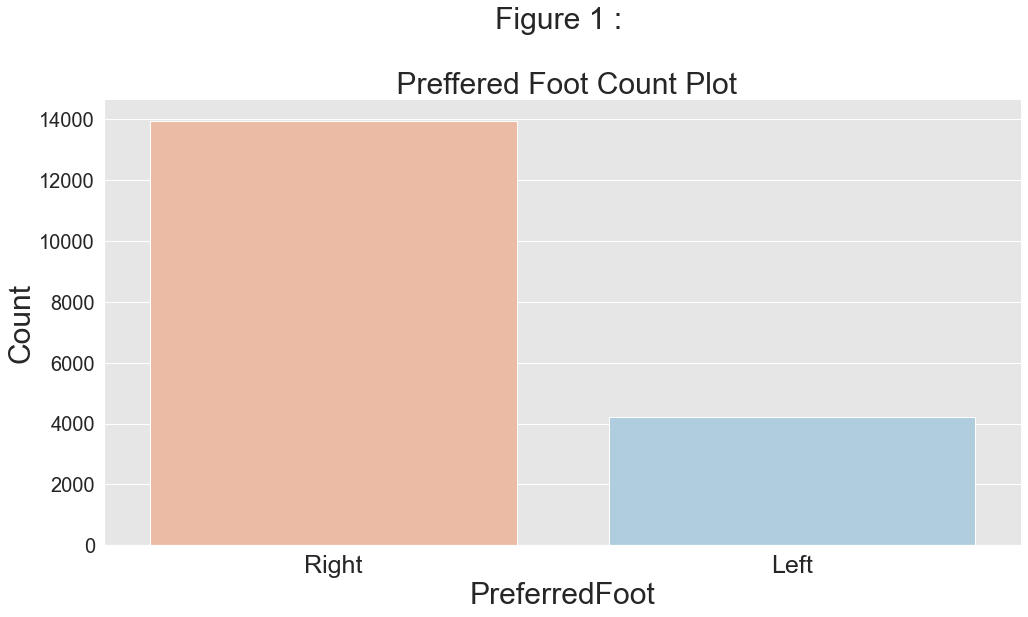

In [13]:
pt = sns.catplot(y="Count",
            x="PreferredFoot", data=counts_preferred_foot,
           palette="RdBu",height=7, aspect=2, kind="bar");
plt.title("Figure 1 : \n\n Preffered Foot Count Plot",
          fontsize=30);

## Dose preffered foot is having some effect on overall ranking ?

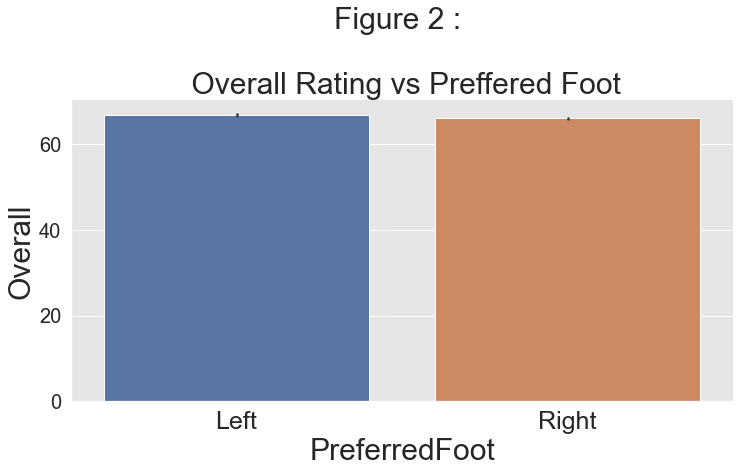

In [14]:
sns.catplot(x="PreferredFoot", y="Overall", data=data,
            aspect=2, kind="bar");
plt.title("Figure 2 : \n\n Overall Rating vs Preffered Foot",
          fontsize=30);

### From figure, it is not very clear that which preffered foot get more rating. It requires some more statistical test analysis. 

In [15]:
sns.catplot(x="PreferredFoot", y="Wage", data=data, aspect=2, kind="bar");
plt.title("Figure 3: \n\n PreferredFoot vs Wage",
          fontsize=30);

In [18]:
#avgwage = data.groupby("PreferredFoot",index=)["Wage"].mean()
#sns.catplot(x=avgwage.index, y=avgwage.values, aspect=2, kind="bar");
#plt.title("Figure 4: \n\n Overall Rating vs Wage",
#          fontsize=30);

### From figure, it seems that Left preffered foot get more rating. But, again i will tell that, It requires some more statistical test analysis. 

<a id='now'></a>
# Nationality, Overall rating and Wage


![](https://www.learningbritishaccent.com/wp-content/uploads/2017/05/countries-and-nationalities.gif)

In [19]:
counts_Nationality = data["Nationality"].value_counts()
counts_Nationality = counts_Nationality.reset_index()
counts_Nationality.columns= ["Nations","Counts"]
counts_Nationality.head()

Nations  Counts
0    England    1662
1    Germany    1198
2      Spain    1072
3  Argentina     937
4     France     914

In [20]:
sns.catplot(y="Nations",
            x="Counts",data=counts_Nationality,
            height=20,kind="bar")
plt.title("Figure : \n\n\n Nation Wise Players Counts",
          fontsize=30);

In [21]:
counts_Nationality_top20 = counts_Nationality.iloc[0:20,:]
print(counts_Nationality_top20)

                Nations  Counts
0               England    1662
1               Germany    1198
2                 Spain    1072
3             Argentina     937
4                France     914
5                Brazil     827
6                 Italy     702
7              Colombia     618
8                 Japan     478
9           Netherlands     453
10               Sweden     397
11             China PR     392
12                Chile     391
13  Republic of Ireland     368
14               Mexico     366
15        United States     353
16               Poland     350
17               Norway     341
18         Saudi Arabia     340
19              Denmark     336


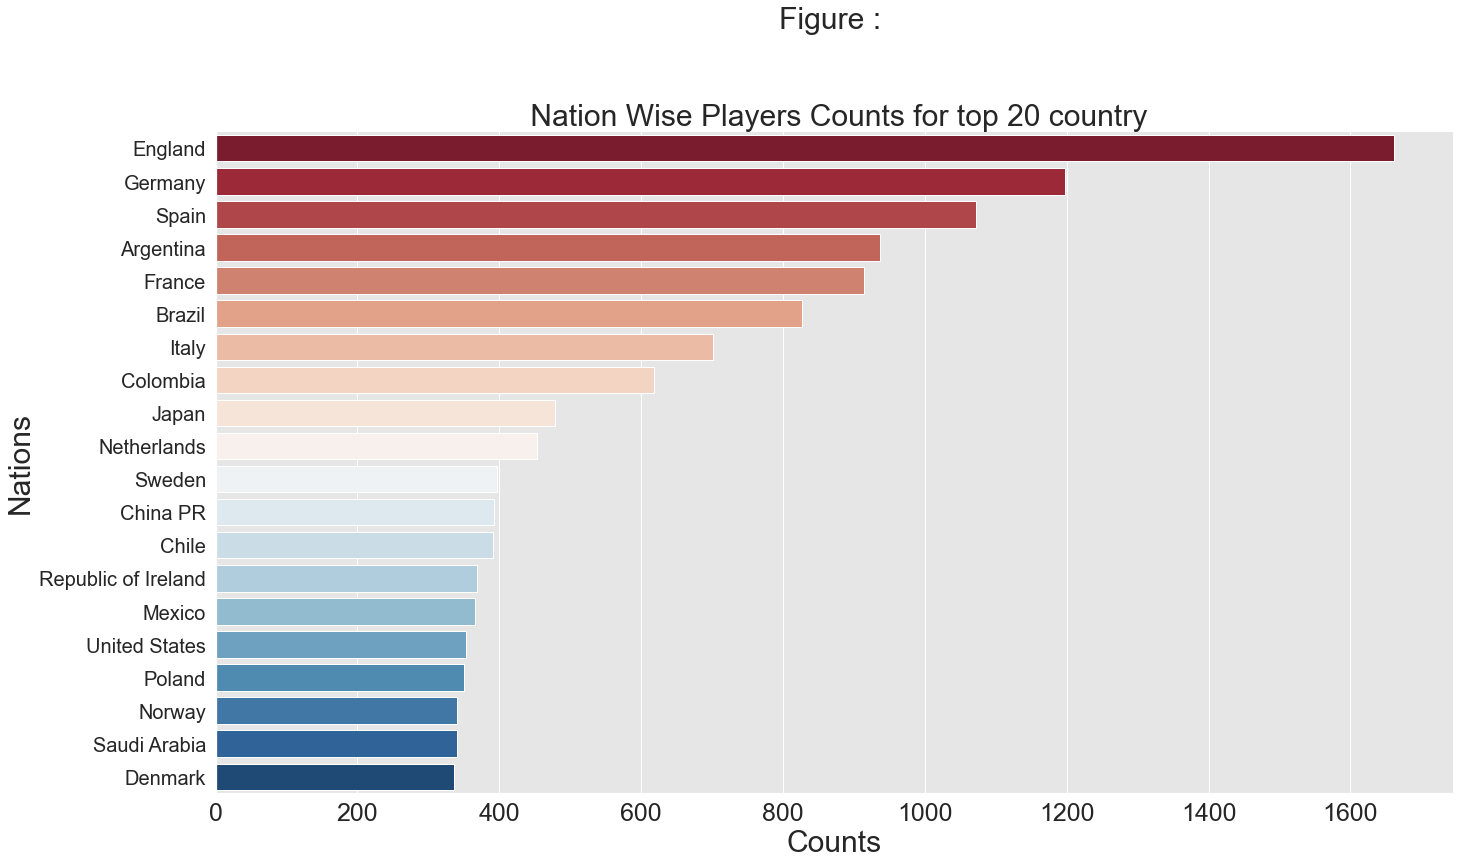

In [22]:
sns.catplot(y="Nations",
            x="Counts",data=counts_Nationality_top20,
            palette="RdBu",height=10,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Nation Wise Players Counts for top 20 country",
          fontsize=30);

In [23]:
avgwageoverall = data.groupby("Nationality", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

<ipython-input-23-3a0c32024a43>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgwageoverall = data.groupby("Nationality", as_index=False)["Wage","Overall"].mean()


Nationality       Wage    Overall
42     Dominican Republic  71.000000  72.000000
156  United Arab Emirates  39.000000  77.000000
56                  Gabon  26.933333  69.466667
7                 Armenia  22.000000  69.000000
35                Croatia  21.682540  69.563492

In [24]:
top10bywage = avgwageoverall.iloc[0:10,:]
top10bywage

Nationality       Wage    Overall
42     Dominican Republic  71.000000  72.000000
156  United Arab Emirates  39.000000  77.000000
56                  Gabon  26.933333  69.466667
7                 Armenia  22.000000  69.000000
35                Croatia  21.682540  69.563492
27   Central African Rep.  19.000000  73.333333
13                Belgium  18.480769  68.811538
2                 Algeria  18.083333  70.633333
20                 Brazil  17.778718  71.251511
47      Equatorial Guinea  17.200000  70.000000

In [25]:
sns.catplot(y="Nationality",
            x="Wage",data=top10bywage,
            palette="RdBu",height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Wage",
          fontsize=30);

In [26]:
avgwageoverall.sort_values(by="Overall",inplace=True,ascending=False)
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

Nationality       Wage    Overall
156  United Arab Emirates  39.000000  77.000000
27   Central African Rep.  19.000000  73.333333
77                 Israel  15.857143  72.142857
42     Dominican Republic  71.000000  72.000000
147   São Tomé & Príncipe  15.000000  72.000000
116                  Oman  12.000000  72.000000
26             Cape Verde  11.526316  71.631579
123              Portugal  14.310559  71.344720
150                  Togo  16.000000  71.333333
20                 Brazil  17.778718  71.251511

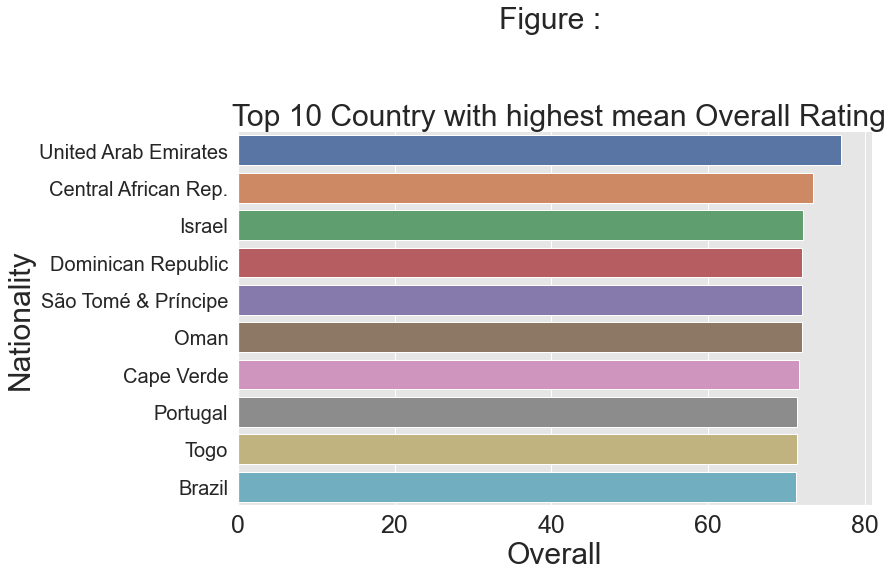

In [27]:
sns.catplot(y="Nationality",
            x="Overall",data=top10byoverall,
           height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Overall Rating",
          fontsize=30);

### Findings Nationality and Overall Rating and Wage. 

- In this dataset most of the players are from England which is followed by Germany.
- Nationality affect wage and overall rating of Player.

<a id='cow'></a>
# Clubs, Overall rating and Wage

![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRUdbrDfm19ae4oqXr_zG8Gj-3sfwdOmahQUIVNqag9GI-cdTAe)

In [28]:
data.Club.unique().shape

(652,)

In [29]:
data.Club.value_counts().shape

(651,)

In [30]:
data.Club.isnull().any()

True

In [31]:
avgwageoverall = data.groupby("Club", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

<ipython-input-31-32b0a9ecfc4a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgwageoverall = data.groupby("Club", as_index=False)["Wage","Overall"].mean()


Club        Wage    Overall
470        Real Madrid  152.030303  78.242424
212       FC Barcelona  146.575758  78.030303
326           Juventus  131.680000  82.280000
374    Manchester City  113.363636  76.727273
375  Manchester United  102.757576  77.242424

In [32]:
top10bywage = avgwageoverall.iloc[0:10,:]
top10bywage

Club        Wage    Overall
470        Real Madrid  152.030303  78.242424
212       FC Barcelona  146.575758  78.030303
326           Juventus  131.680000  82.280000
374    Manchester City  113.363636  76.727273
375  Manchester United  102.757576  77.242424
134            Chelsea   98.454545  76.787879
363          Liverpool   87.939394  76.000000
583  Tottenham Hotspur   79.484848  76.696970
214  FC Bayern München   78.827586  77.000000
52             Arsenal   78.424242  75.181818

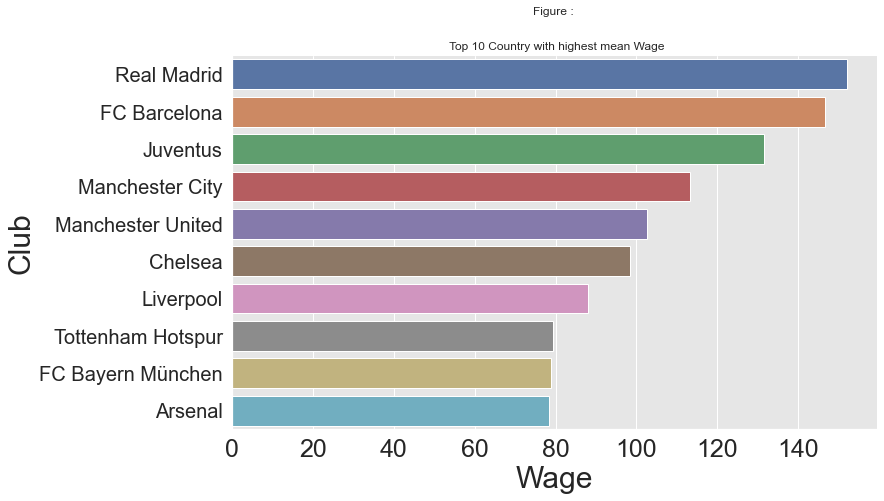

In [33]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':25,
            'ytick.labelsize':20})
sns.catplot(y="Club",
            x="Wage",data=top10bywage,
           height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Wage");

In [34]:
avgwageoverall.sort_values(by="Overall",inplace=True,ascending=False)
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

Club        Wage    Overall
326             Juventus  131.680000  82.280000
398               Napoli   71.080000  80.000000
315                Inter   66.500000  79.750000
470          Real Madrid  152.030303  78.242424
382                Milan   72.481481  78.074074
212         FC Barcelona  146.575758  78.030303
435  Paris Saint-Germain   72.033333  77.433333
482                 Roma   53.807692  77.423077
375    Manchester United  102.757576  77.242424
214    FC Bayern München   78.827586  77.000000

In [35]:
sns.catplot(y="Club",
            x="Overall",data=top10byoverall,
           height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Overall Rating");

### Findings Clubs and Overall Rating and Wage. 

- There are 651 clubs.
- Club column has missing value too.
- Club is having very distinct affect on wage.
- Club is not having very sharp impact on overall rating.

<a id='aow'></a>
# Dose age affect, Overall rating and Wage ?

![](https://visibletime.ararchive.com/_Archies_Weird_Mysteries-gif_.gif)

In [36]:
data.Age.value_counts()

21    1423
26    1387
24    1358
22    1340
23    1332
25    1319
20    1240
27    1162
28    1101
19    1024
29     959
30     917
18     732
31     707
32     574
33     408
34     404
17     289
35     196
36     127
37      82
16      42
38      37
39      25
40      13
41       5
44       2
42       1
45       1
Name: Age, dtype: int64

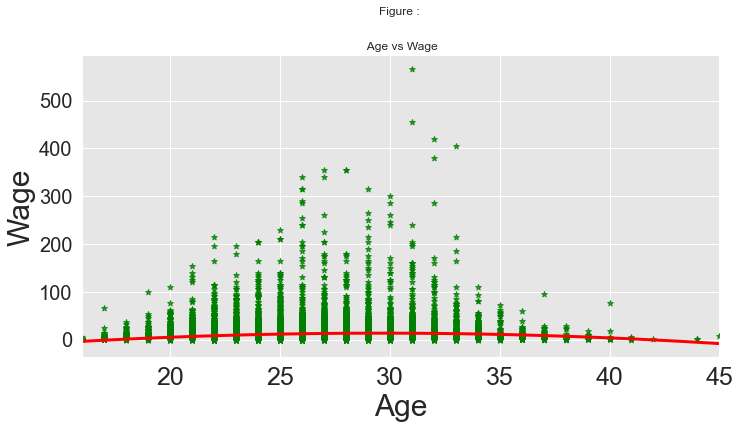

In [37]:
sns.lmplot(x="Age", y="Wage",data=data,markers="*",
           order=2, ci=None, scatter_kws={"color": "green"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Age vs Wage");

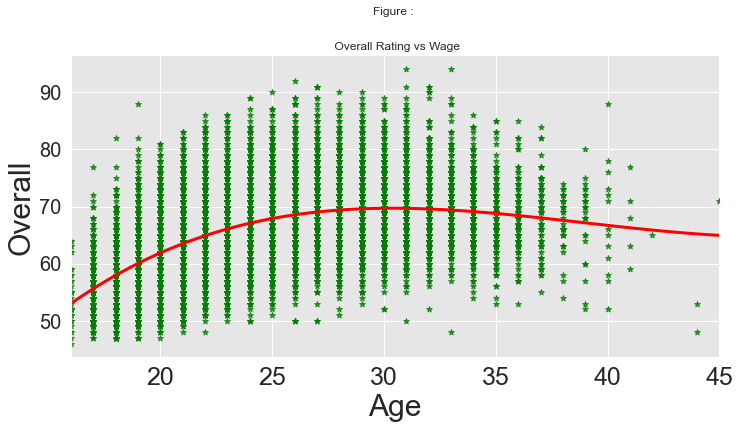

In [38]:

sns.lmplot(x="Age", y="Overall",data=data,markers="*",
           order=3, ci=None, scatter_kws={"color": "green"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);

plt.title("Figure : \n\n\n Overall Rating vs Wage");
plt.show()


### Findings Age and Overall Rating and Wage. 

- Age lies between 11 to 95.
- Age of a Player does not affect much on their Wage.
- As Age increase the Overall rating increases.

<a id='btow'></a>
# Dose BodyType affect, Overall rating and Wage ?

![](https://i.pinimg.com/originals/44/52/28/4452282bd744b5426afd44cfb083ddc1.gif)

In [39]:
data.BodyType.value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Shaqiri                    1
PLAYER_BODY_TYPE_25        1
Courtois                   1
Akinfenwa                  1
Neymar                     1
C. Ronaldo                 1
Messi                      1
Name: BodyType, dtype: int64

In [40]:
data.BodyType.unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa', nan],
      dtype=object)

In [41]:
avgwageoverall = data.groupby("BodyType", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

<ipython-input-41-19d0ce2768a5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgwageoverall = data.groupby("BodyType", as_index=False)["Wage","Overall"].mean()


BodyType   Wage  Overall
4                Messi  565.0     94.0
1           C. Ronaldo  405.0     94.0
5               Neymar  290.0     92.0
7  PLAYER_BODY_TYPE_25  255.0     88.0
2             Courtois  240.0     89.0

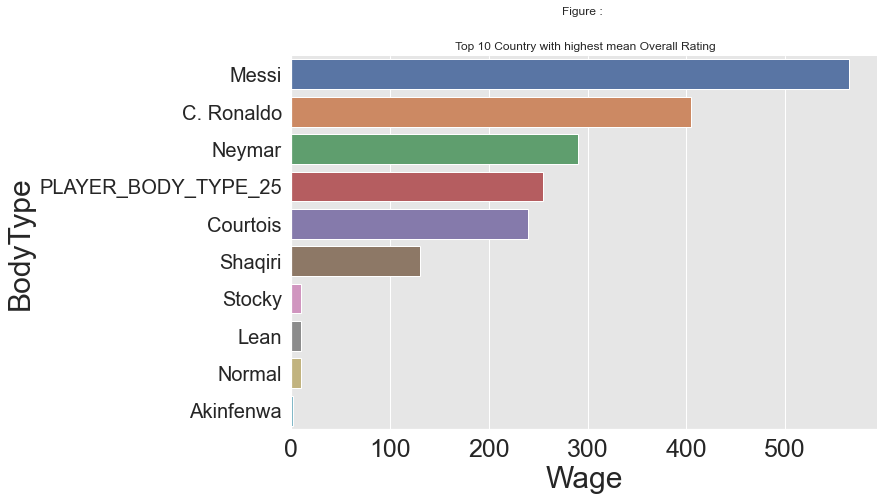

In [42]:
sns.catplot(y="BodyType",
            x="Wage",data=avgwageoverall,
           height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Overall Rating");

In [43]:
avgwageoverall.sort_values(by="Overall",inplace=True,ascending=False)
avgwageoverall.head()

BodyType   Wage  Overall
4                Messi  565.0     94.0
1           C. Ronaldo  405.0     94.0
5               Neymar  290.0     92.0
2             Courtois  240.0     89.0
7  PLAYER_BODY_TYPE_25  255.0     88.0

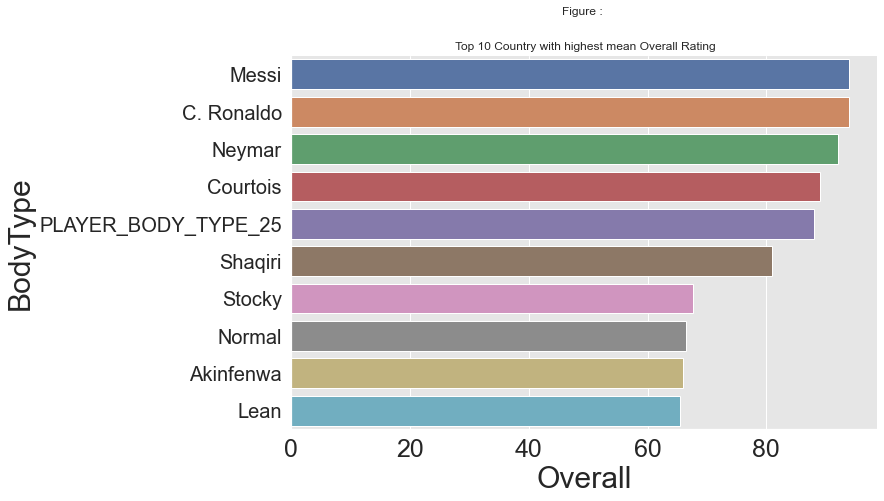

In [44]:
sns.catplot(y="BodyType",
            x="Overall",data=avgwageoverall,
           height=6,kind="bar",aspect=2)
plt.title("Figure : \n\n\n Top 10 Country with highest mean Overall Rating");

# Findings BodyType and Overall Rating and Wage. 

- 10 Different types of BodyType.
- BodyType column has missing values.
- Body Type affect player wage as Messy body type has highest wage. The wage of players having C. Ronaldo body type follow Messy body type players in context of wage 
- Body Type affect player overall rating as Messy and C. Ronaldo bodies type has highest Overall rating. The Overall rating of player  having Neymar type follow Messy body type players in context of overall rating.

<a id='pow'></a>
# Dose Penalties affect, Overall rating and Wage ?

![](https://media0.giphy.com/media/W3IehBNe8vBKOPISwP/giphy.gif)

In [45]:
data.Penalties.value_counts()

45.0    492
55.0    488
49.0    480
48.0    473
58.0    471
       ... 
87.0      3
7.0       1
92.0      1
91.0      1
5.0       1
Name: Penalties, Length: 87, dtype: int64

In [46]:
data.Penalties.head()

0    75.0
1    85.0
2    81.0
3    40.0
4    79.0
Name: Penalties, dtype: float64

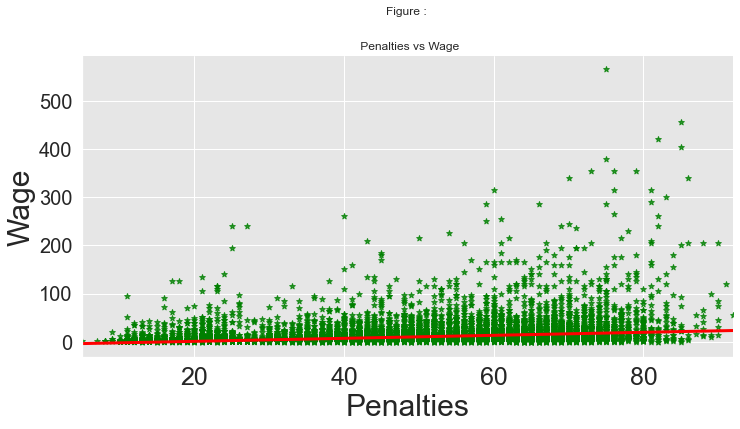

In [47]:
sns.lmplot(x="Penalties", y="Wage",data=data,markers="*",
           order=1, ci=None, scatter_kws={"color": "green"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Penalties vs Wage");

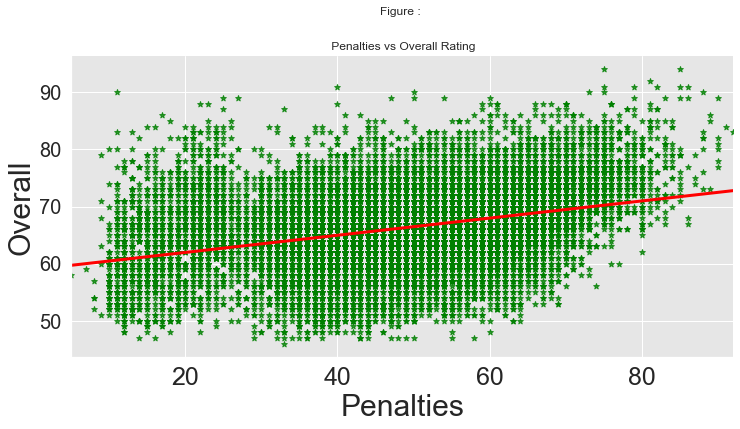

In [48]:
sns.lmplot(x="Penalties", y="Overall",data=data,markers="*",
           order=1, ci=None, scatter_kws={"color": "green"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Penalties vs Overall Rating");

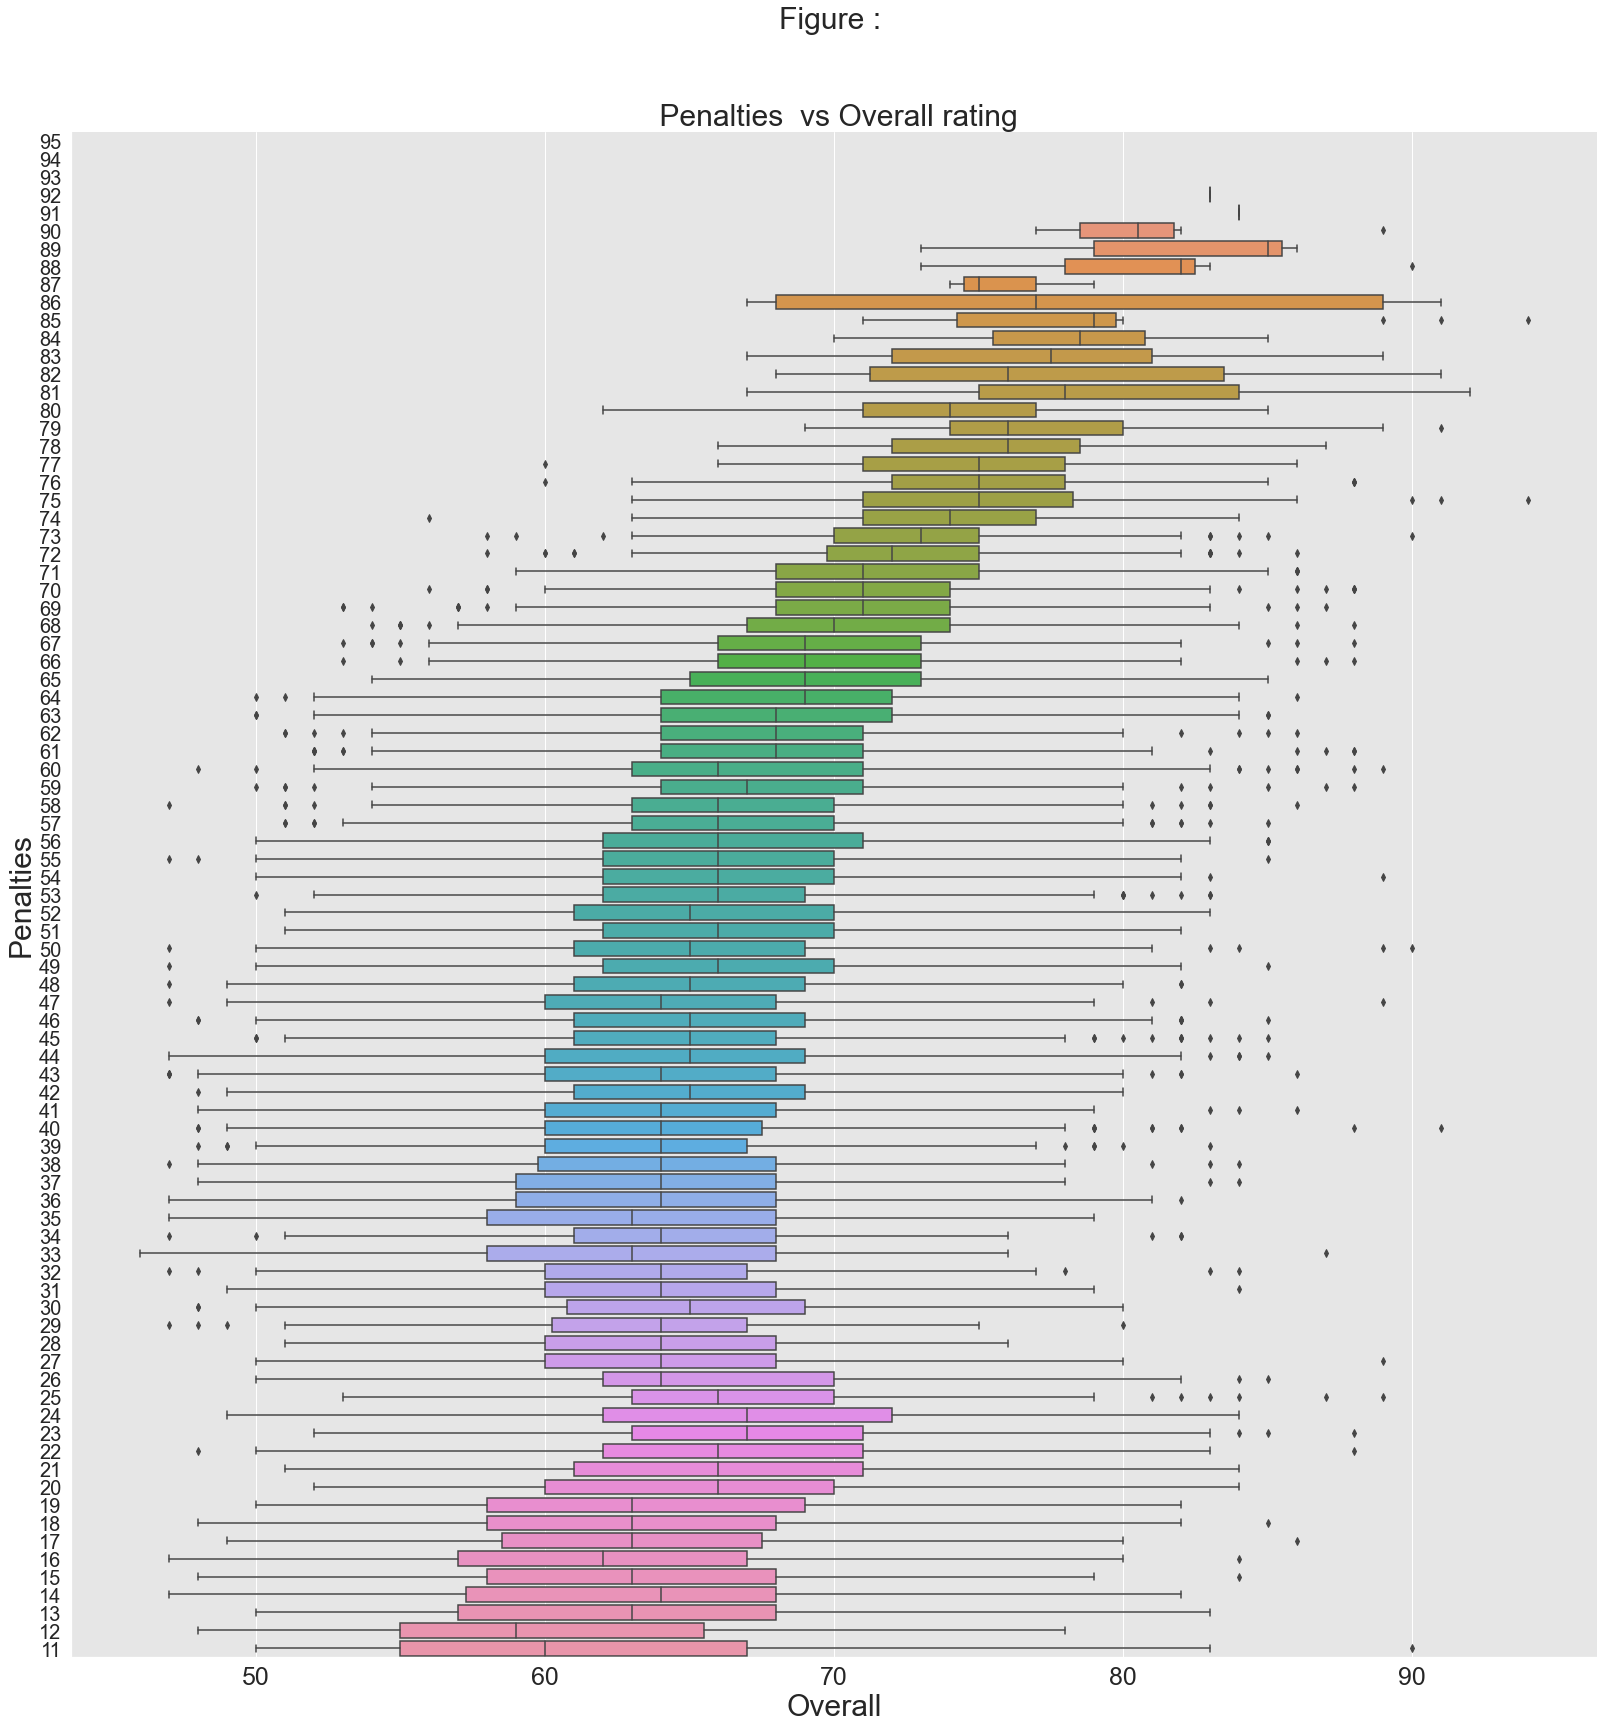

In [49]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':25,
            'ytick.labelsize':20})
sns.catplot(y="Penalties", x="Overall",data=data,
            orient="h",order=range(95,10,-1),
            kind="box",height=22);
plt.title("Figure : \n\n\n Penalties  vs Overall rating", fontsize=30);

### Findings Penalties and Overall Rating and Wage. 

- Penalties lies between 11 to 95.
- Penalties of a Player does not affect much on their Wage.
- As Penalties increase the Overall rating increases.

<a id='agow'></a>
# Dose Aggression affect, Overall rating and Wage ?

![](https://i.pinimg.com/originals/0f/51/d5/0f51d51ed2a227794e100a116a88ae0b.gif)

In [50]:
data.Aggression.head()

0    48.0
1    63.0
2    56.0
3    38.0
4    76.0
Name: Aggression, dtype: float64

In [51]:
data.Aggression.value_counts()

65.0    516
68.0    514
70.0    489
60.0    464
58.0    458
       ... 
14.0     11
94.0      8
11.0      5
93.0      3
95.0      1
Name: Aggression, Length: 85, dtype: int64

In [52]:
sns.lmplot(x="Aggression", y="Wage",data=data,markers="*",
           order=1, ci=None, scatter_kws={"color": "green"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Aggression vs Wage");

In [53]:
sns.lmplot(x="Aggression", y="Overall",data=data,markers="*",
           order=1, ci=None, scatter_kws={"color": "green"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Aggression vs Wage");

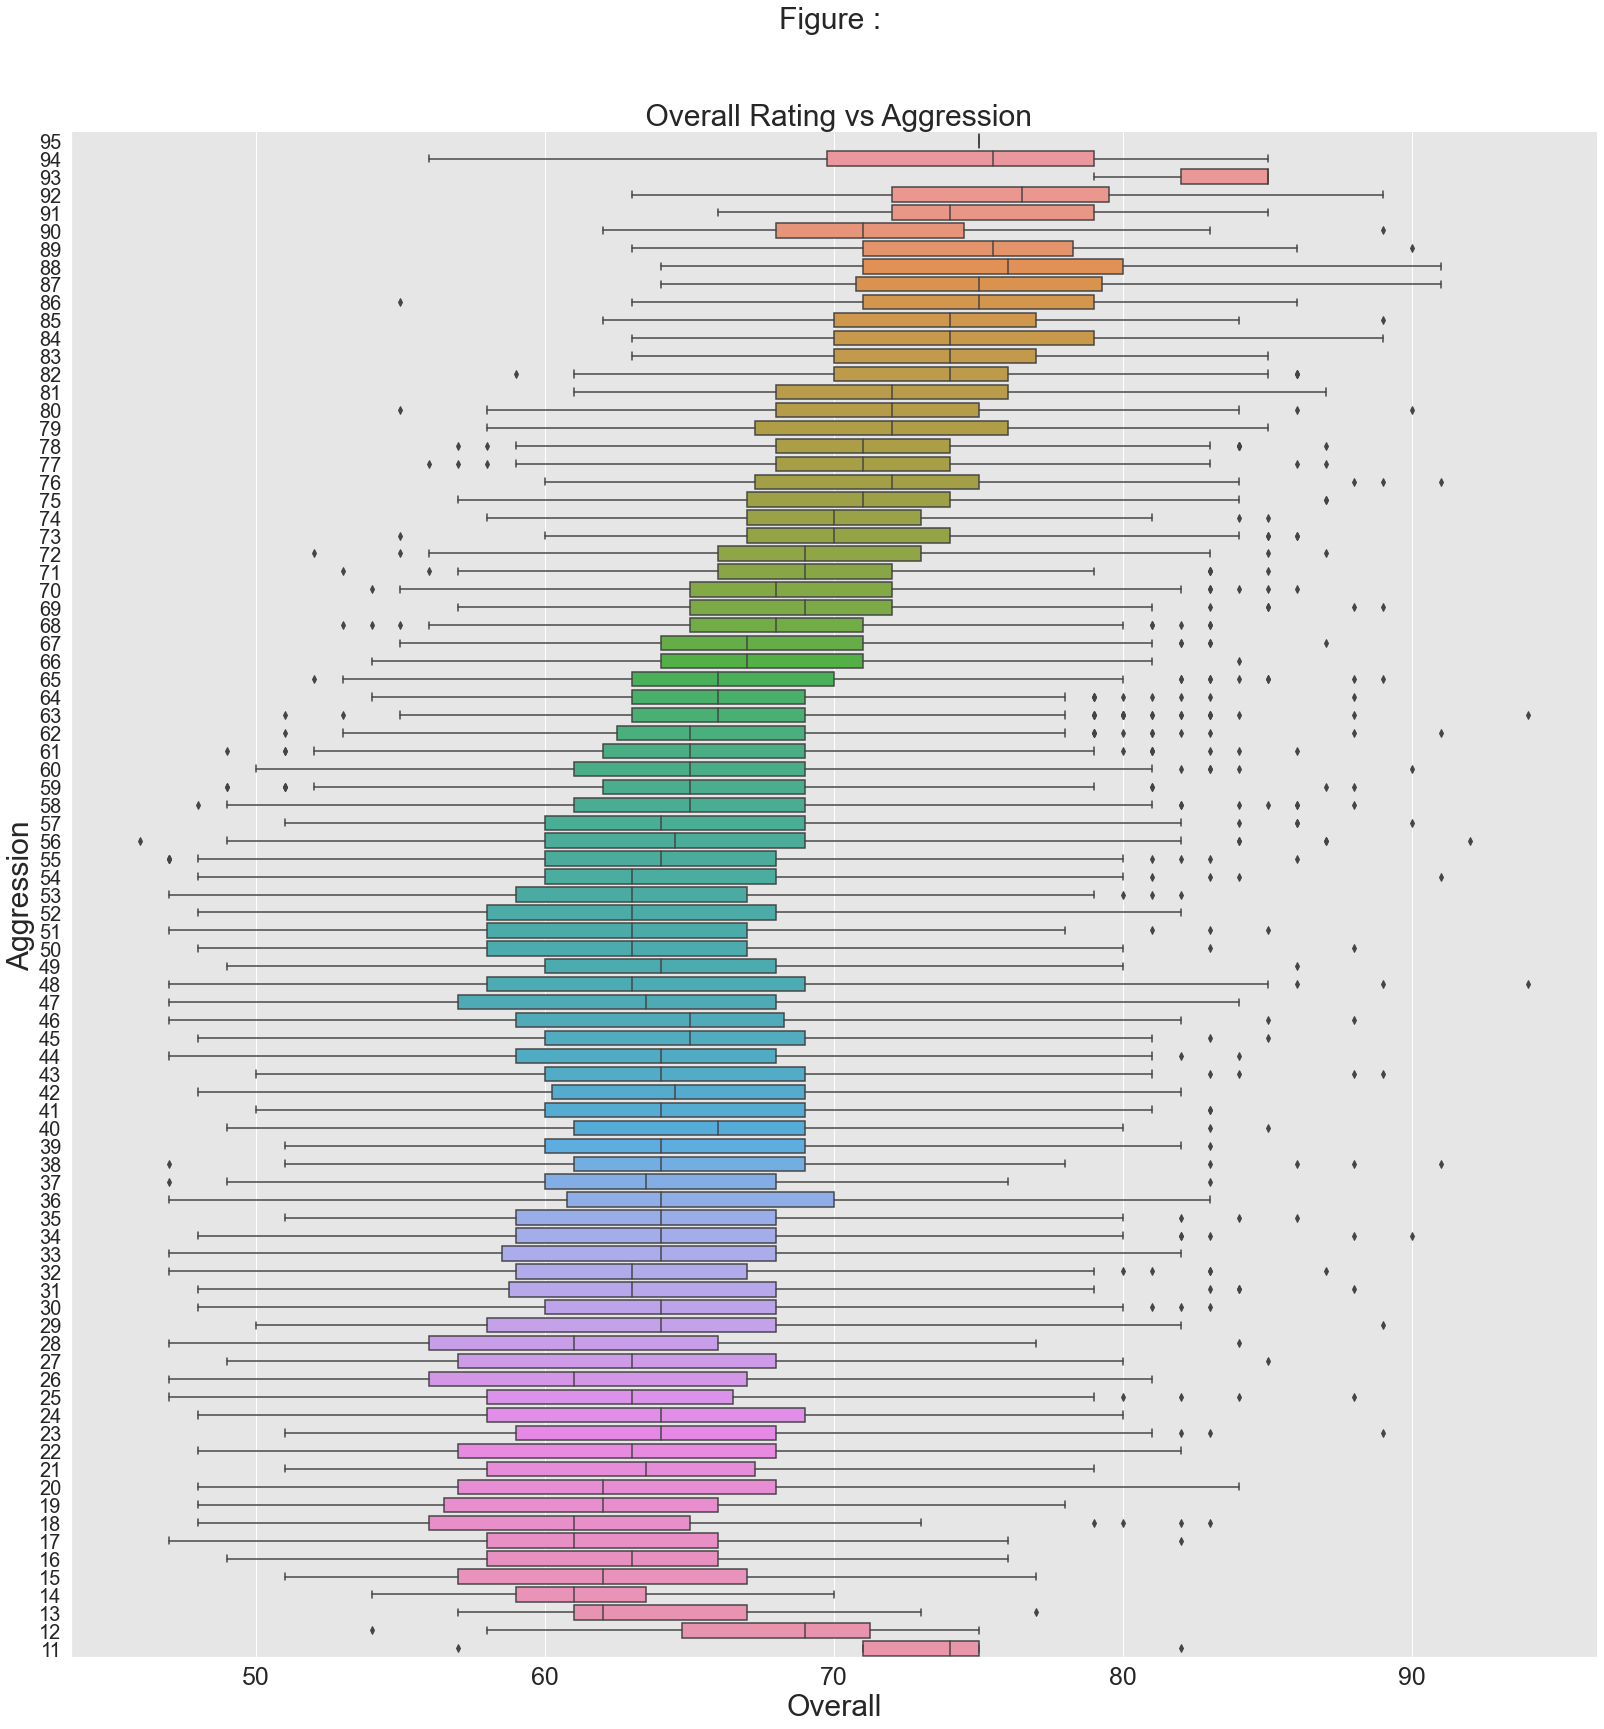

In [54]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':25,
            'ytick.labelsize':20})
sns.catplot(x="Overall", y="Aggression",data=data,
            orient="h",order=range(95,10,-1),
            kind="box",height=22);
plt.title("Figure : \n\n\n Overall Rating vs Aggression", fontsize=30);

### Findings Aggression and Overall Rating and Wage. 

- Aggression lies between 11 to 95.
- Aggression of a Player does not affect much on their Wage.
- As Aggression increase the Overall rating increases.

<a id='how'></a>
# Dose Height affect, Overall rating and Wage ?

![](https://media.tenor.com/images/68ed5df4166a3afbc053e1860dcfe8f9/tenor.gif)

In [55]:
data.Height.value_counts()

6'0     2881
5'10    2479
5'9     2238
5'11    2159
6'2     2015
6'1     1908
6'3      990
5'8      946
5'7      905
6'4      749
5'6      316
6'5      246
5'5      145
6'6       93
5'4       30
6'7       21
5'3       18
6'8       10
5'2        5
5'1        3
6'9        2
Name: Height, dtype: int64

In [56]:
# Missing value in Height data
data.Height.unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [57]:
dataHeight = data.loc[:,["Height","Wage","Overall"]].sort_values("Height")
dataHeight.head()

Height  Wage  Overall
17157    5'1   1.0       55
6275     5'1   7.0       69
6584     5'1   5.0       69
18206   5'10   1.0       46
10257   5'10   2.0       65

In [58]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':15,
            'ytick.labelsize':20})
sns.catplot(x="Height", y="Wage",data=dataHeight,
           order = ["5'1","5'2","5'3","5'4","5'5","5'6",
                   "5'7","5'8","5'9","5'10","5'11","6'0","6'1",
                   "6'2","6'3","6'4","6'5","6'6","6'7","6'8", "6'9"],
            kind="box",aspect=2.5);
plt.title("Figure : \n\n\n Height vs Overall Rating");

In [59]:
avgwageoverall = data.groupby("Height", as_index=False)["Wage","Overall"].mean()
avgwageoverall.sort_values(by="Wage",inplace=True,ascending=False)
avgwageoverall.head()

<ipython-input-59-81ac0dba7e8e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avgwageoverall = data.groupby("Height", as_index=False)["Wage","Overall"].mean()


Height       Wage    Overall
5     5'4  12.100000  67.400000
15    6'4  11.387183  66.951936
17    6'6  11.247312  66.709677
13    6'2  10.917122  67.018859
9     5'8  10.423890  66.344609

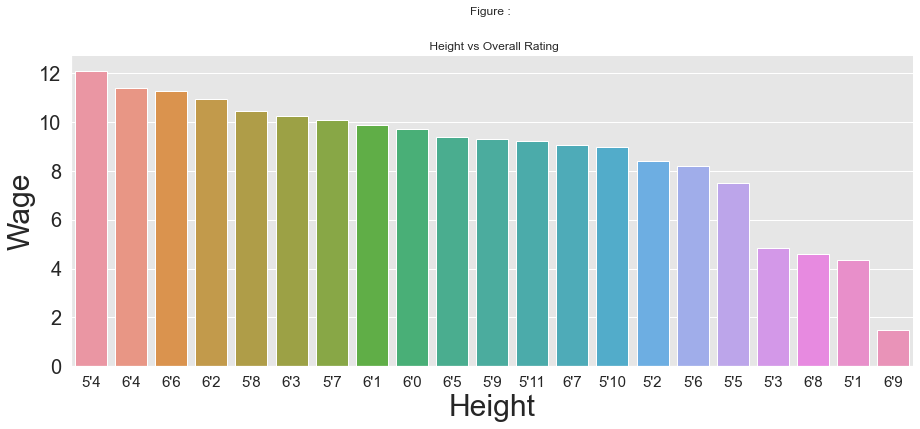

In [60]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':15,
            'ytick.labelsize':20})
sns.catplot(x="Height", y="Wage",data=avgwageoverall,
            kind="bar",aspect=2.5);
plt.title("Figure : \n\n\n Height vs Overall Rating");

In [61]:
sns.set(rc={"font.style":"normal",
            "axes.facecolor":(0.9, 0.9, 0.9),
            "figure.facecolor":'white',
            'axes.labelsize':30,
            'xtick.labelsize':15,
            'ytick.labelsize':20})
sns.catplot(x="Height", y="Overall",data=dataHeight,
           order = ["5'1","5'2","5'3","5'4","5'5","5'6",
                   "5'7","5'8","5'9","5'10","5'11","6'0","6'1",
                   "6'2","6'3","6'4","6'5","6'6","6'7","6'8", "6'9" ],
            kind="box",aspect=2.5);
plt.title("Figure : \n\n\n Height vs Overall Rating");

### Findings Height and Overall Rating and Wage. 

- There are 20 unique heights of players.
- Minimum height of player is 5.1'.
- Maximum height of players height is 6.9'.
- Height is having missing value too.
- Height is having effect on wage but not in regular fashion.

<a id='weow'></a>
# Dose Weight affect, Overall rating and Wage ?

![](https://media1.tenor.com/images/5444dec9d4bde7d214720636447313ba/tenor.gif?itemid=10297422)

In [62]:
data.Weight.head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [63]:
# Remove lbs from weight data and make it numeric
data.Weight = data.Weight.str.replace("lbs","").astype("float")
data.Weight.head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [64]:
data.Weight.value_counts()

165.0    1483
154.0    1439
176.0    1041
172.0     987
159.0     946
161.0     936
163.0     901
170.0     860
168.0     836
174.0     705
150.0     660
157.0     617
181.0     584
183.0     513
179.0     507
152.0     506
143.0     505
187.0     448
148.0     435
185.0     432
146.0     365
141.0     322
190.0     288
194.0     278
139.0     206
192.0     193
137.0     165
198.0     156
196.0     143
132.0     127
201.0      93
134.0      87
203.0      75
205.0      60
207.0      45
209.0      34
130.0      33
128.0      31
212.0      23
123.0      18
126.0      14
214.0      11
121.0      10
216.0       9
117.0       6
218.0       5
119.0       4
225.0       3
223.0       3
236.0       2
227.0       2
110.0       2
229.0       1
234.0       1
115.0       1
220.0       1
243.0       1
Name: Weight, dtype: int64

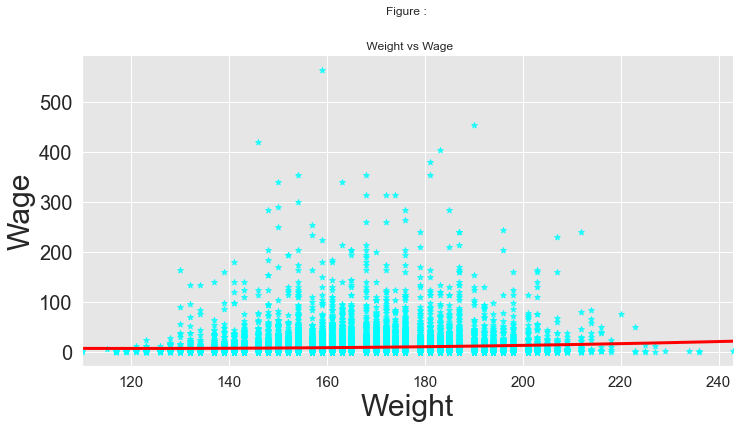

In [65]:
sns.lmplot(x="Weight", y="Wage",data=data,markers="*",
           order=2, ci=None, scatter_kws={"color": "cyan"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Weight vs Wage");

In [66]:
sns.lmplot(x="Weight", y="Overall",data=data,markers="*",
           order=2, ci=None, scatter_kws={"color": "cyan"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Weight vs Overall Rating");

### Findings Weight and Overall Rating and Wage. 

- There are 95 unique posining of players.
- Weight of a Player does not affect much on their Wage.
- Weight of Player does affect Overall rating of a player.
- And it is amazing that Overall rating of player increase with weight.

<a id='poow'></a>
# Dose Positioning affect, Overall rating and Wage ?

Positioning is the player’s ability to take up good positions on the field during a game. The higher this stat, the more likely a player is to make enough space to receive the ball in dangerous areas.

This attribute deals with a player’s ability to spot open space and move into good positions that offer an attacking advantage. However, it doesn’t affect where the player will be when taking a free kick or a corner.

Defnition taken from website : https://www.fifauteam.com/fifa-20-attributes-guide/


![](https://www.ptechnyc.org/cms/lib/NY01001829/Centricity/Domain/14/Isreal.gif)

In [67]:
data.Positioning.value_counts()

58.0    574
65.0    537
62.0    516
64.0    509
60.0    503
       ... 
90.0      4
91.0      3
93.0      2
95.0      1
94.0      1
Name: Positioning, Length: 94, dtype: int64

In [68]:
data.Positioning.unique().shape

(95,)

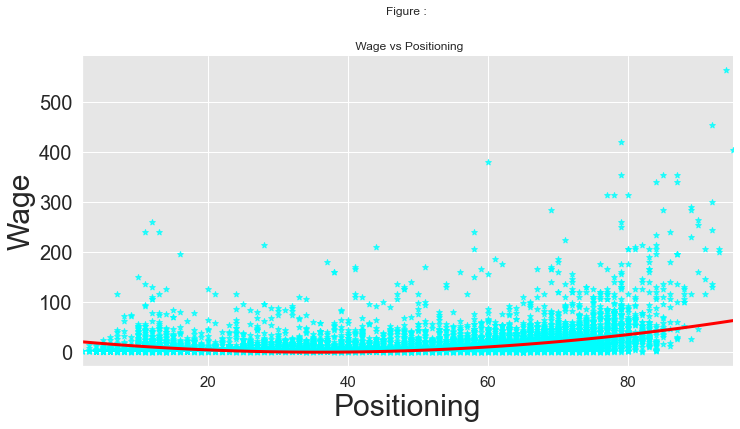

In [69]:
sns.lmplot(x="Positioning", y="Wage",data=data,markers="*",
           order=2, ci=None, scatter_kws={"color": "cyan"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Wage vs Positioning");

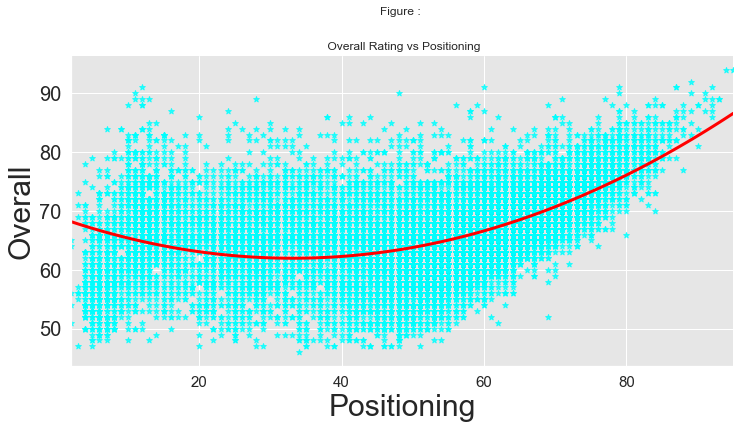

In [70]:
sns.lmplot(x="Positioning", y="Overall",data=data,markers="*",
           order=2, ci=None, scatter_kws={"color": "cyan"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Overall Rating vs Positioning");

### Findings Positioning and Overall Rating and Wage. 

- There are 95 unique posining of players.
- Positioning of a Player does not affect much on their Wage.
- Positioning of Player does affect Overall rating of a player.
- Upto player position 40 their Overall rating decrease then it increase.

<a id='rrpp'></a>
# Relationship between Overall Rating and Potential of a player. 

![](https://media.newyorker.com/photos/5df79d5bcc6af10008f6d465/master/pass/2019-Thomas-Sports-edit.gif)

### Potential of player (Following is defnition)

- This is a prediction that how player attribute will grow. It serve as a guide.
- Potential of player is not its rating.


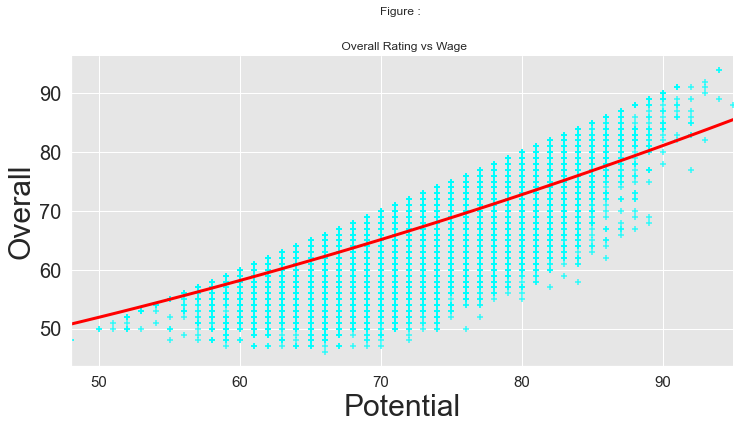

In [71]:
sns.lmplot(x="Potential", y="Overall",data=data,markers="+",
           order=2, ci=None, scatter_kws={"color": "cyan"},
         line_kws={"linewidth":3,"color":"red"},aspect=2);
plt.title("Figure : \n\n\n Overall Rating vs Wage");

### Findings Overall Rating and Potential. 

- Overall rating is directly proportional to Potential. (As Potential increases the overall rating also increases.
- As potential is estimated, in simalar way rating to the players is done.

<a id='twhp'></a>
# Team which has Potential 

Public always appreciate potential. Analysis on team potentials show the future of Football. 

In [72]:
data.Club.value_counts()

Manchester United            33
Burnley                      33
FC Barcelona                 33
Arsenal                      33
Empoli                       33
                             ..
Atlético Paranaense          20
América FC (Minas Gerais)    20
Limerick FC                  19
Sligo Rovers                 19
Derry City                   18
Name: Club, Length: 651, dtype: int64

In [73]:
avgwageoverall = data.groupby("Club", as_index=False)["Potential"].mean()
avgwageoverall.sort_values(by="Potential",inplace=True,ascending=False)
avgwageoverall.head()

Club  Potential
326           Juventus  85.520000
212       FC Barcelona  85.303030
470        Real Madrid  84.636364
374    Manchester City  83.909091
214  FC Bayern München  83.655172

In [74]:
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

Club  Potential
326             Juventus  85.520000
212         FC Barcelona  85.303030
470          Real Madrid  84.636364
374      Manchester City  83.909091
214    FC Bayern München  83.655172
435  Paris Saint-Germain  83.566667
398               Napoli  83.440000
375    Manchester United  82.666667
134              Chelsea  82.636364
382                Milan  82.555556

In [75]:
sns.catplot(y="Club",
            x="Potential",data=top10byoverall,
           height=6,kind="bar",aspect=2,palette="Greens_r")
plt.title("Figure : \n\n\n Top 10 Clubs with highest Mean Potential");

In [76]:
data.Nationality

0        Argentina
1         Portugal
2           Brazil
3            Spain
4          Belgium
           ...    
18202      England
18203       Sweden
18204      England
18205      England
18206      England
Name: Nationality, Length: 18207, dtype: object

In [77]:
avgwageoverall = data.groupby("Nationality", as_index=False)["Potential"].mean()
avgwageoverall.sort_values(by="Potential",inplace=True,ascending=False)
avgwageoverall.head()

Nationality  Potential
42     Dominican Republic  80.500000
156  United Arab Emirates  78.000000
28                   Chad  78.000000
27   Central African Rep.  76.000000
128                Russia  75.341772

In [78]:
top10byoverall = avgwageoverall.iloc[0:10,:]
top10byoverall

Nationality  Potential
42     Dominican Republic  80.500000
156  United Arab Emirates  78.000000
28                   Chad  78.000000
27   Central African Rep.  76.000000
128                Russia  75.341772
123              Portugal  75.298137
47      Equatorial Guinea  75.200000
155               Ukraine  75.095890
139                 Spain  74.616604
35                Croatia  74.492063

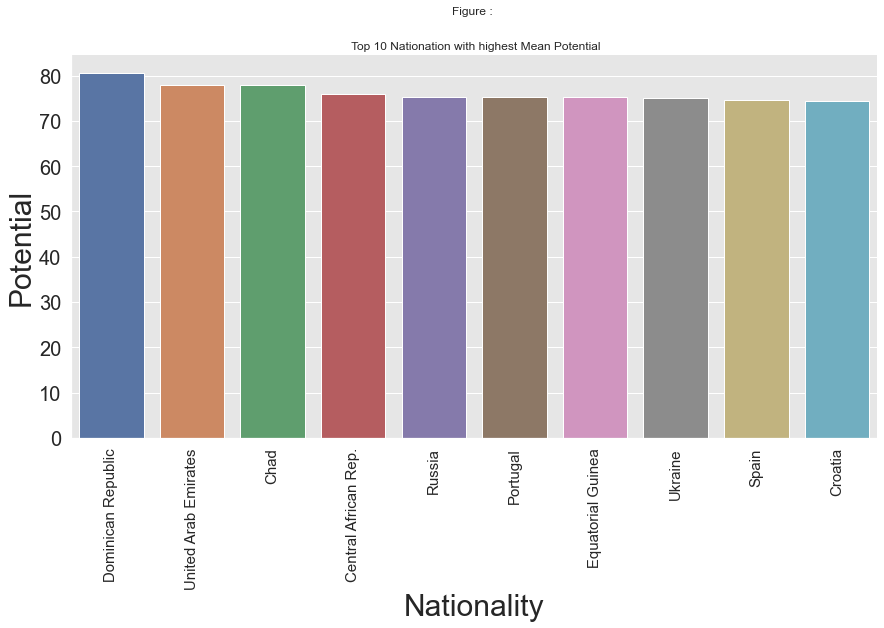

In [79]:
sns.catplot(x="Nationality",
            y="Potential",data=top10byoverall,
           height=6,kind="bar",aspect=2)
plt.xticks(rotation=90)
plt.title("Figure : \n\n\n Top 10 Nationation with highest Mean Potential");

<a id='findings'></a>
# Findings 


- Preffered foot has not much effect on either wage or overall rating. 
- Nationality affect wage and overall rating of Player.
- Club is having very distinct affect on wage.
- Club is not having very sharp impact on overall rating.
- Age of a Player does not affect much on their Wage.
- As Age increase the Overall rating increases.
- Body Type affect player wage as Messy body type has highest wage. The wage of players having C. Ronaldo body type follow Messy body type players in context of wage 
- Body Type affect player overall rating as Messy and C. Ronaldo bodies type has highest Overall rating. The Overall rating of player  having Neymar type follow Messy body type players in context of overall rating.
- Penalties of a Player does not affect much on their Wage.
- As Penalties increase the Overall rating increases.
- Aggression of a Player does not affect much on their Wage.
- As Aggression increase the Overall rating increases.
- Weight of a Player does not affect much on their Wage.
- Weight of Player does affect Overall rating of a player.
- And it is amazing that Overall rating of player increase with weight.
- Positioning of Player does affect Overall rating of a player.
- Upto player position 40 their Overall rating decrease then it increase.
- As potential is estimated, in simalar way rating to the players is done.


# Upvote if you like it